We will take our best model yet and evalute it on the daily dirs we have not seen yet

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from SimpleCNN import SimpleCNN
from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
test_dirs = ['2024-07-10_06_42_46', '2024-08-16_11_10_13', '2024-07-15_06_54_24', '2024-07-25_08_15_51', '2024-07-20_08_05_50', '2024-08-01_13_00_51'] #, '2024-07-20_08_05_50', '2024-08-01_13_00_51']
# test_dirs = ['2024-07-25_08_15_51']
MODEL_PATH = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


In [3]:
WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.95
OVERLAP_THRESHOLD = 0.30
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

In [4]:
# model = SimpleCNN()
model = RegNet()
model.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 449, Gyro: 449
Bout shape - Acc: 891, Gyro: 891
Bout shape - Acc: 422, Gyro: 422
Bout shape - Acc: 524, Gyro: 524
Bout shape - Acc: 426, Gyro: 426
Bout shape - Acc: 523, Gyro: 523
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 513, Gyro: 513
Bout shape - Acc: 864, Gyro: 864
Bout shape - Acc: 490, Gyro: 490
Bout shape - Acc: 627, Gyro: 627
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 520, Gyro: 520
Bout shape - Acc: 665, Gyro: 665
Bout shape - Acc: 624, Gyro: 624
Bout shape - Acc: 594, Gyro: 594
The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])
There are 120 FP's of 133 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.3)
FP's are at rate of 90.23%
TP's

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


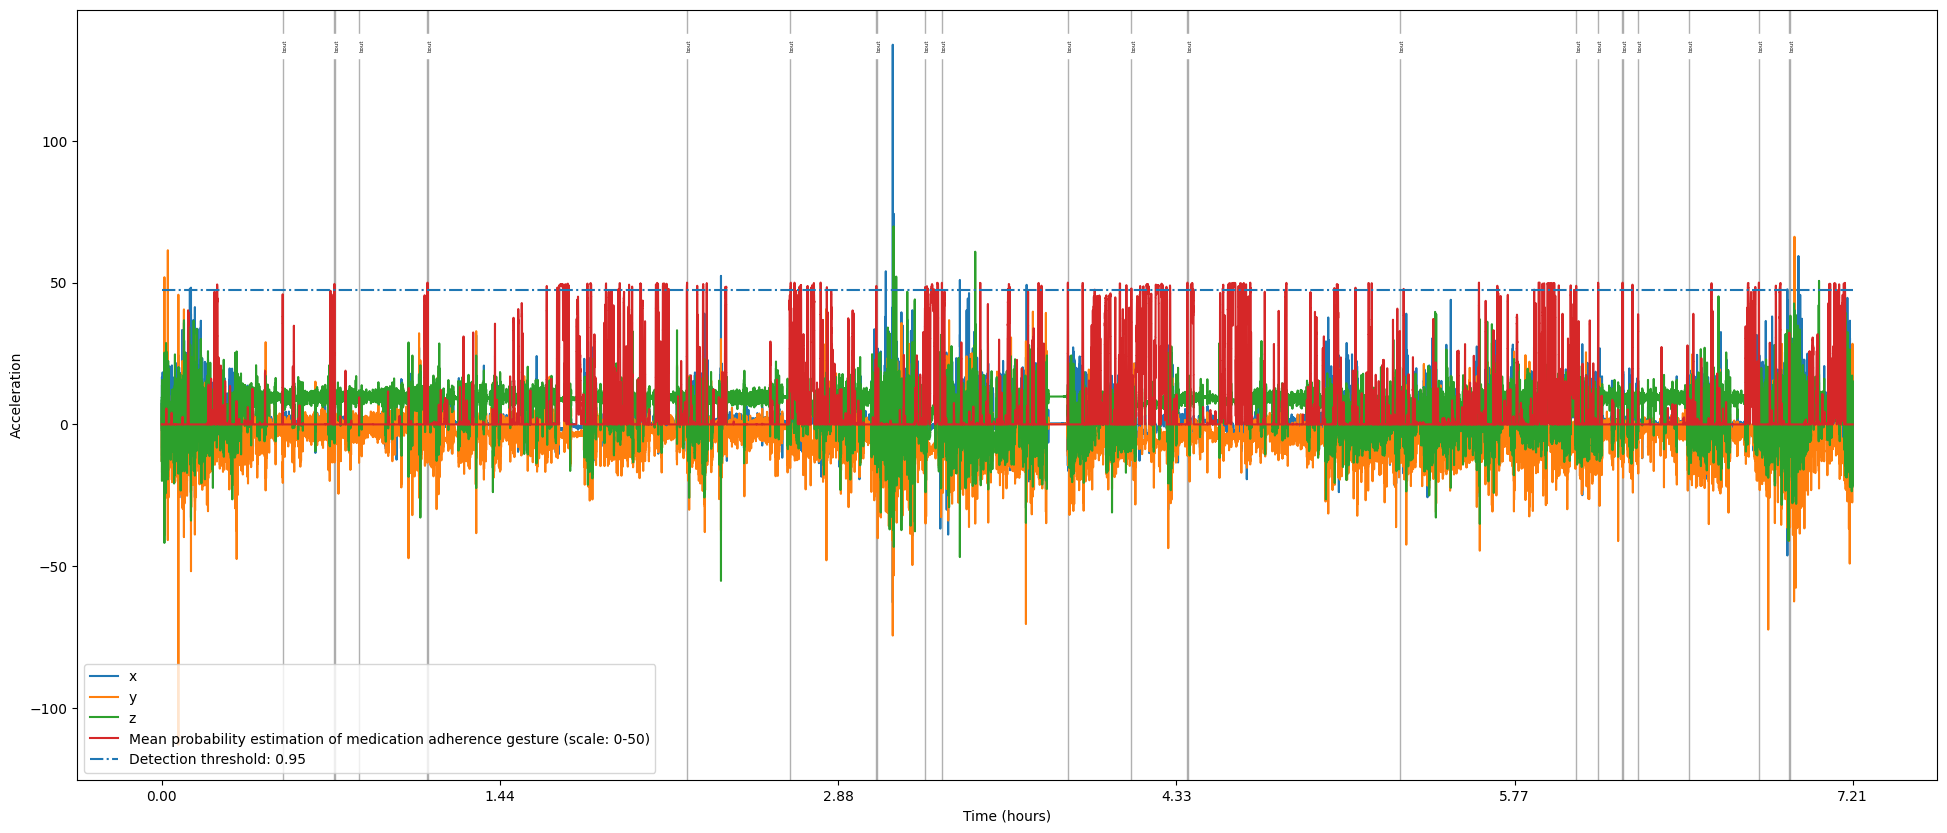

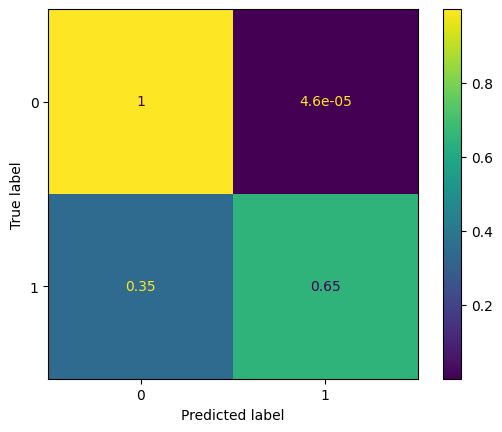

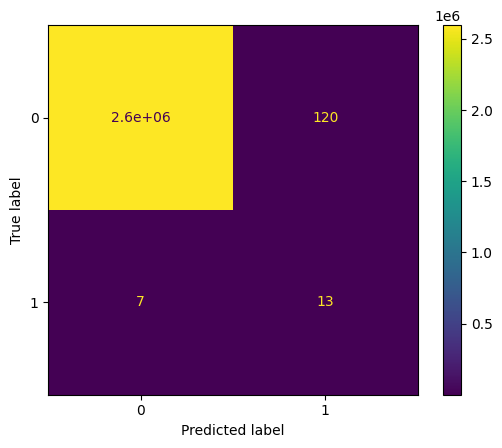

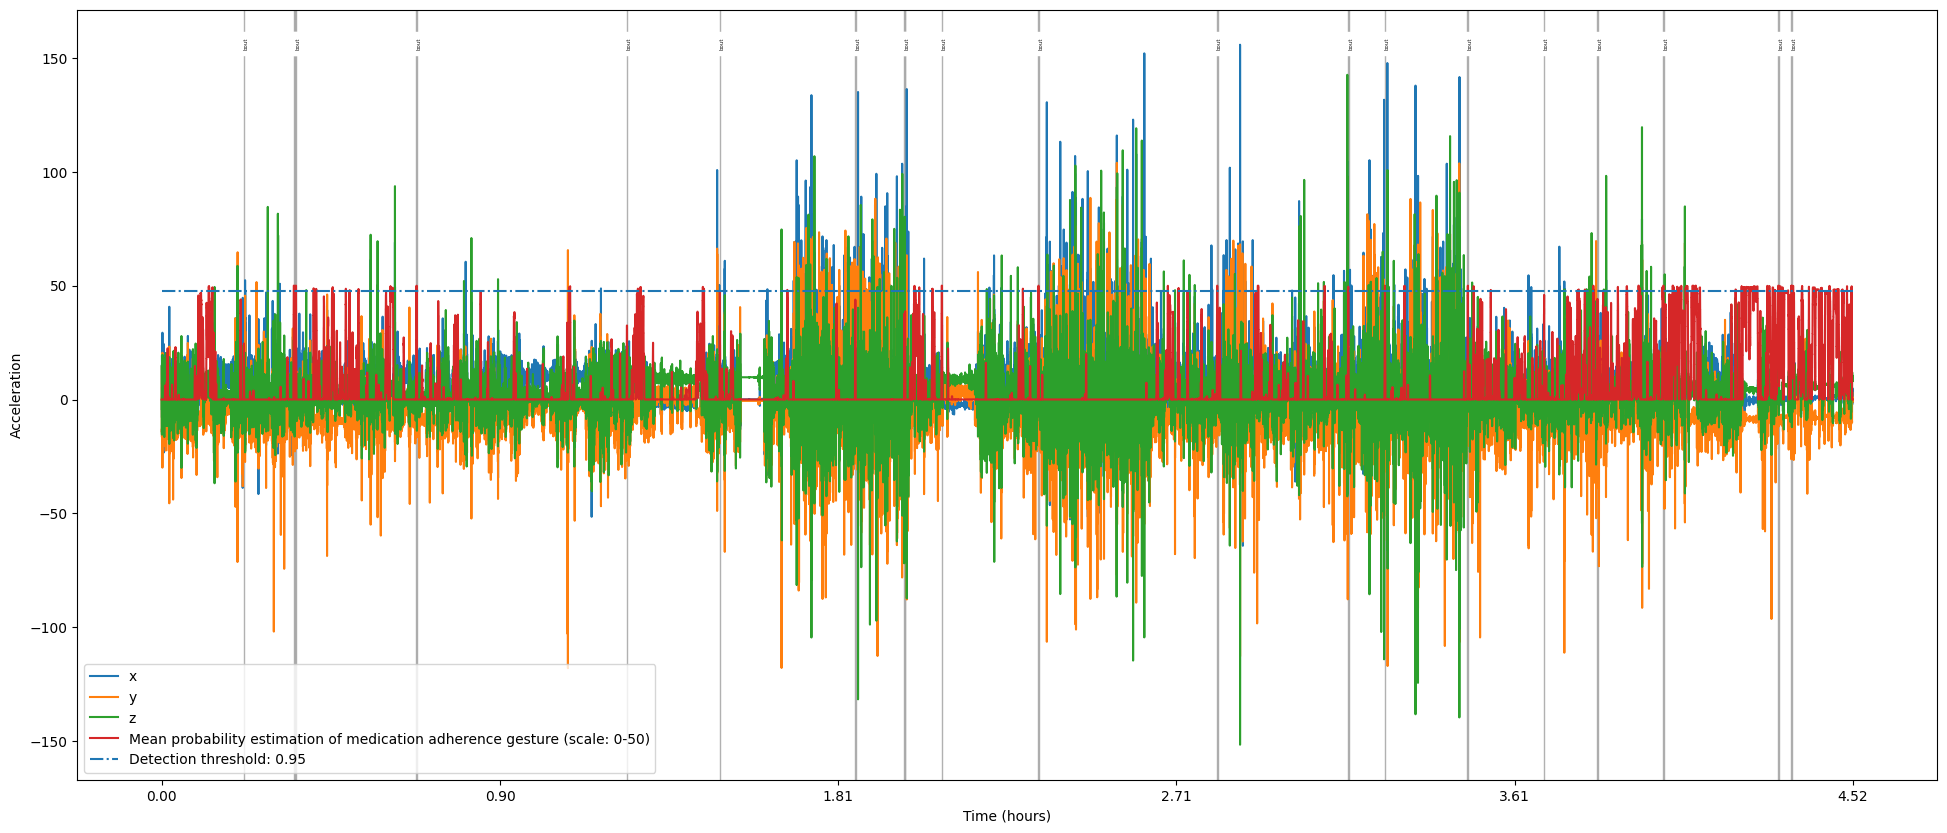

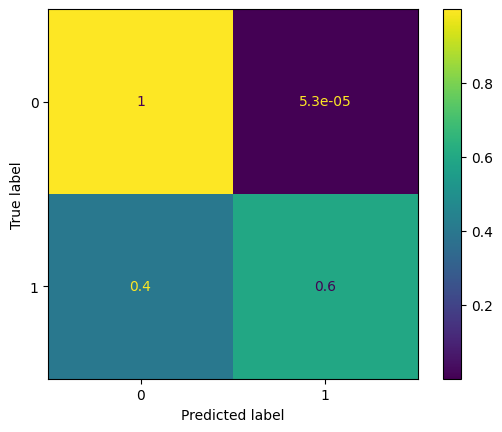

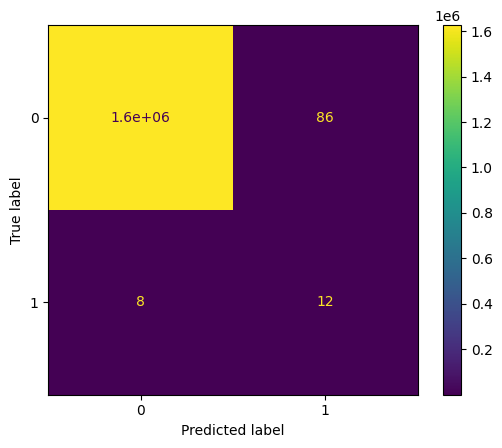

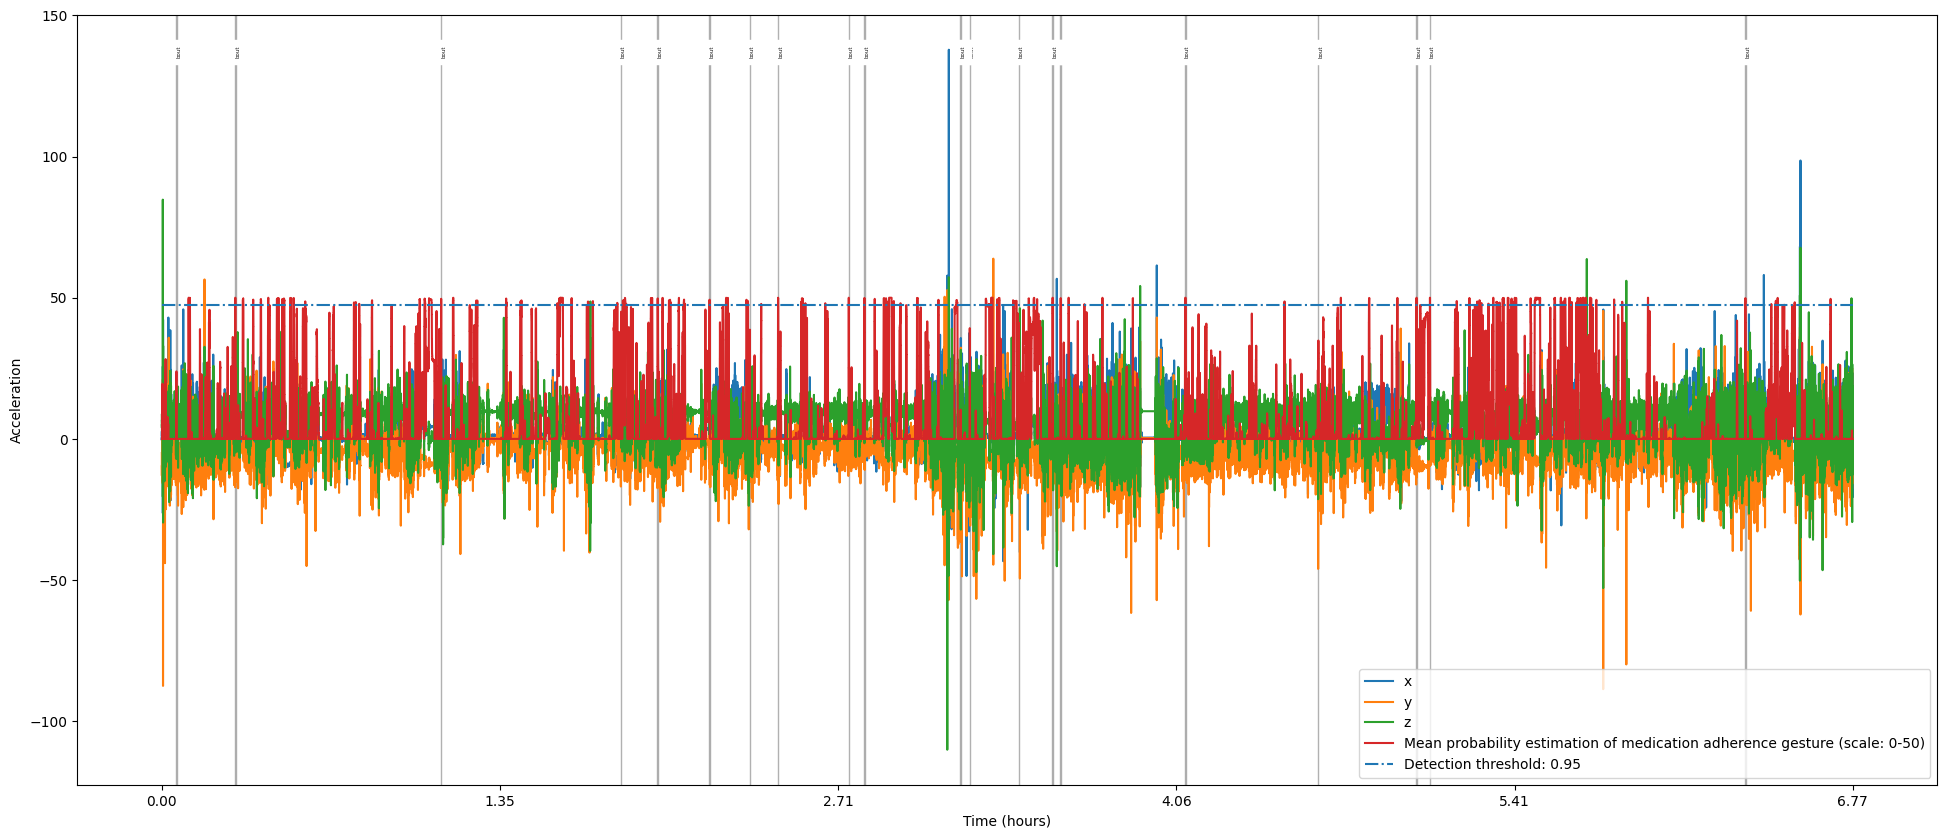

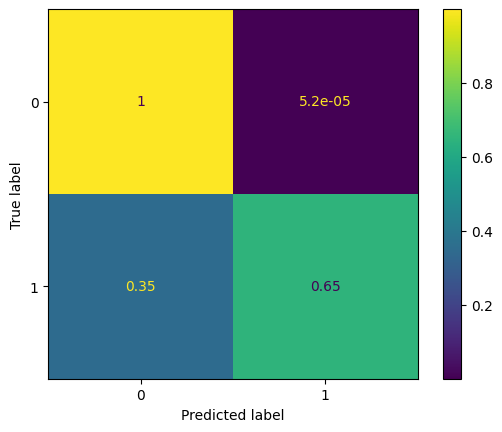

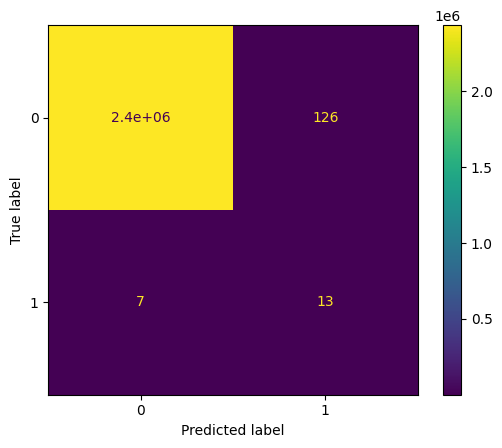

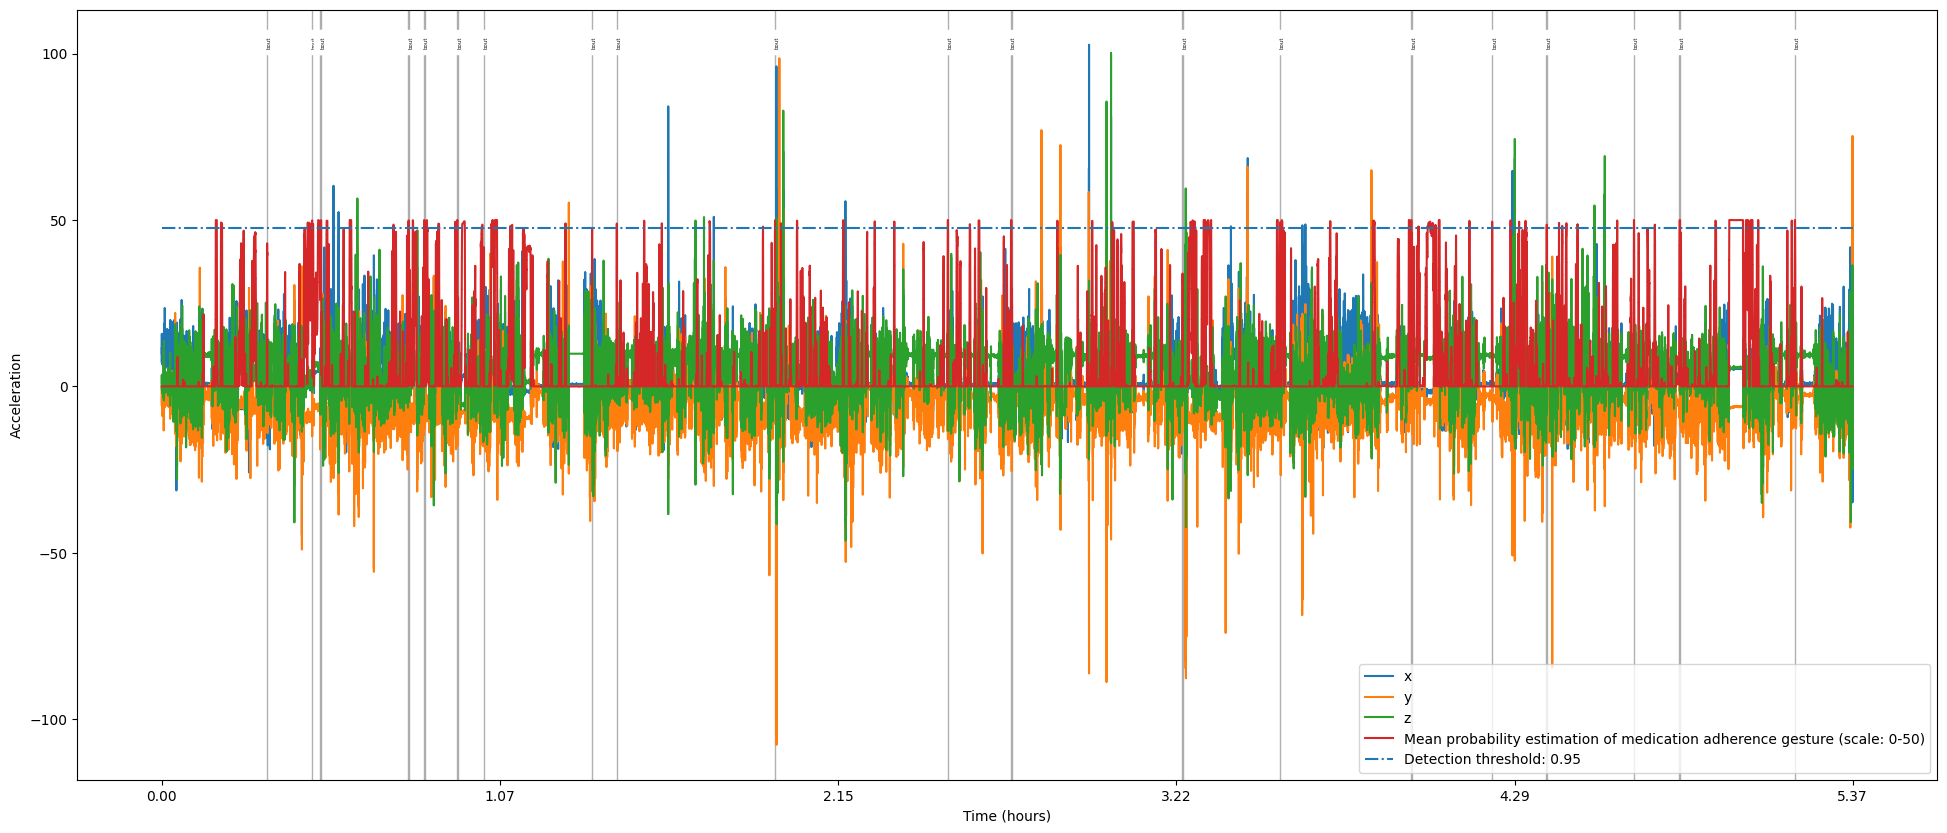

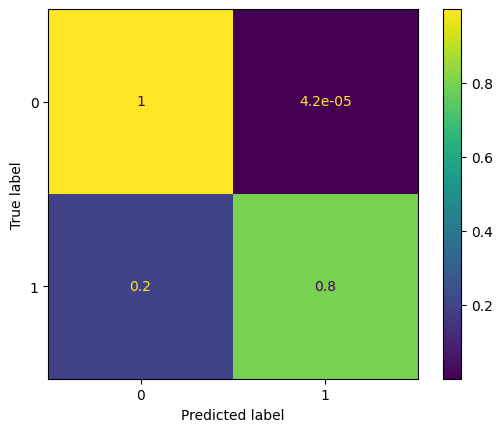

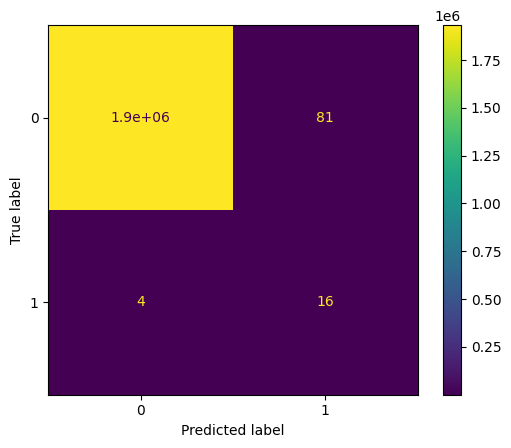

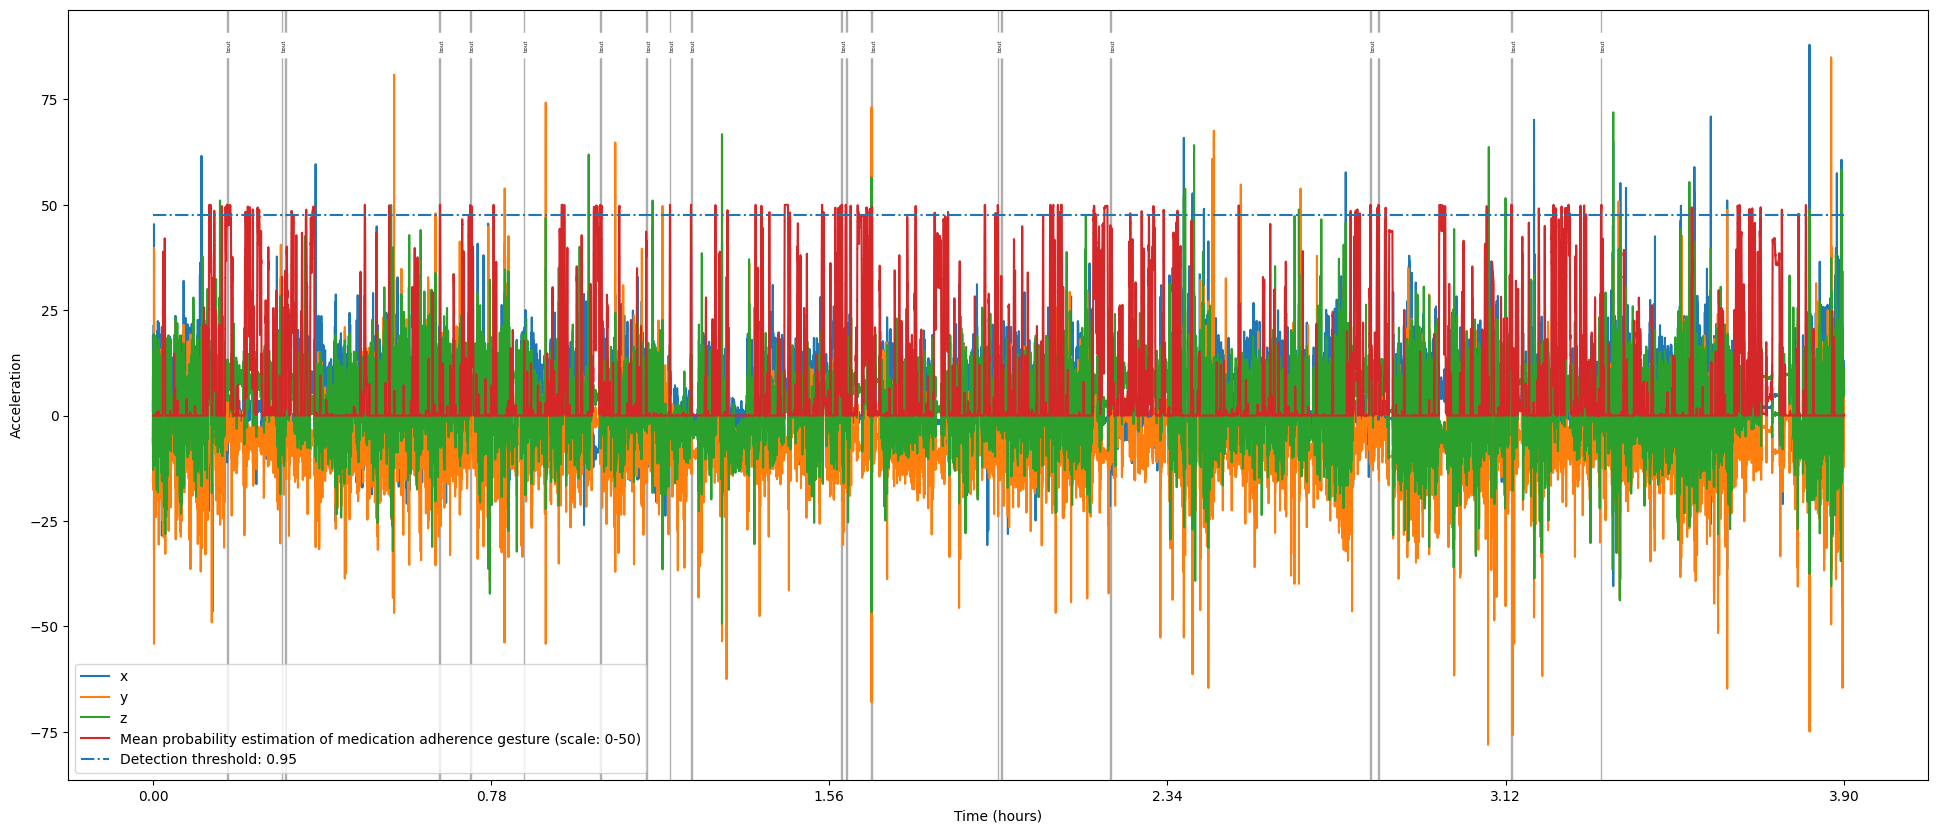

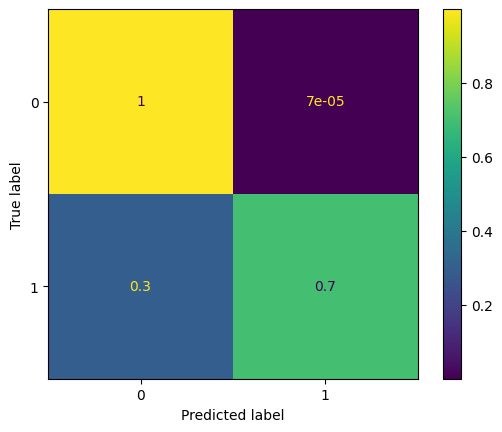

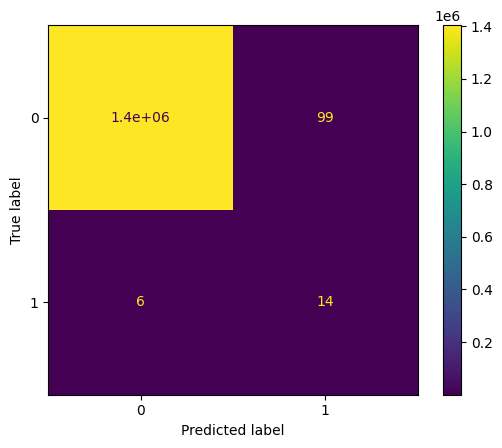

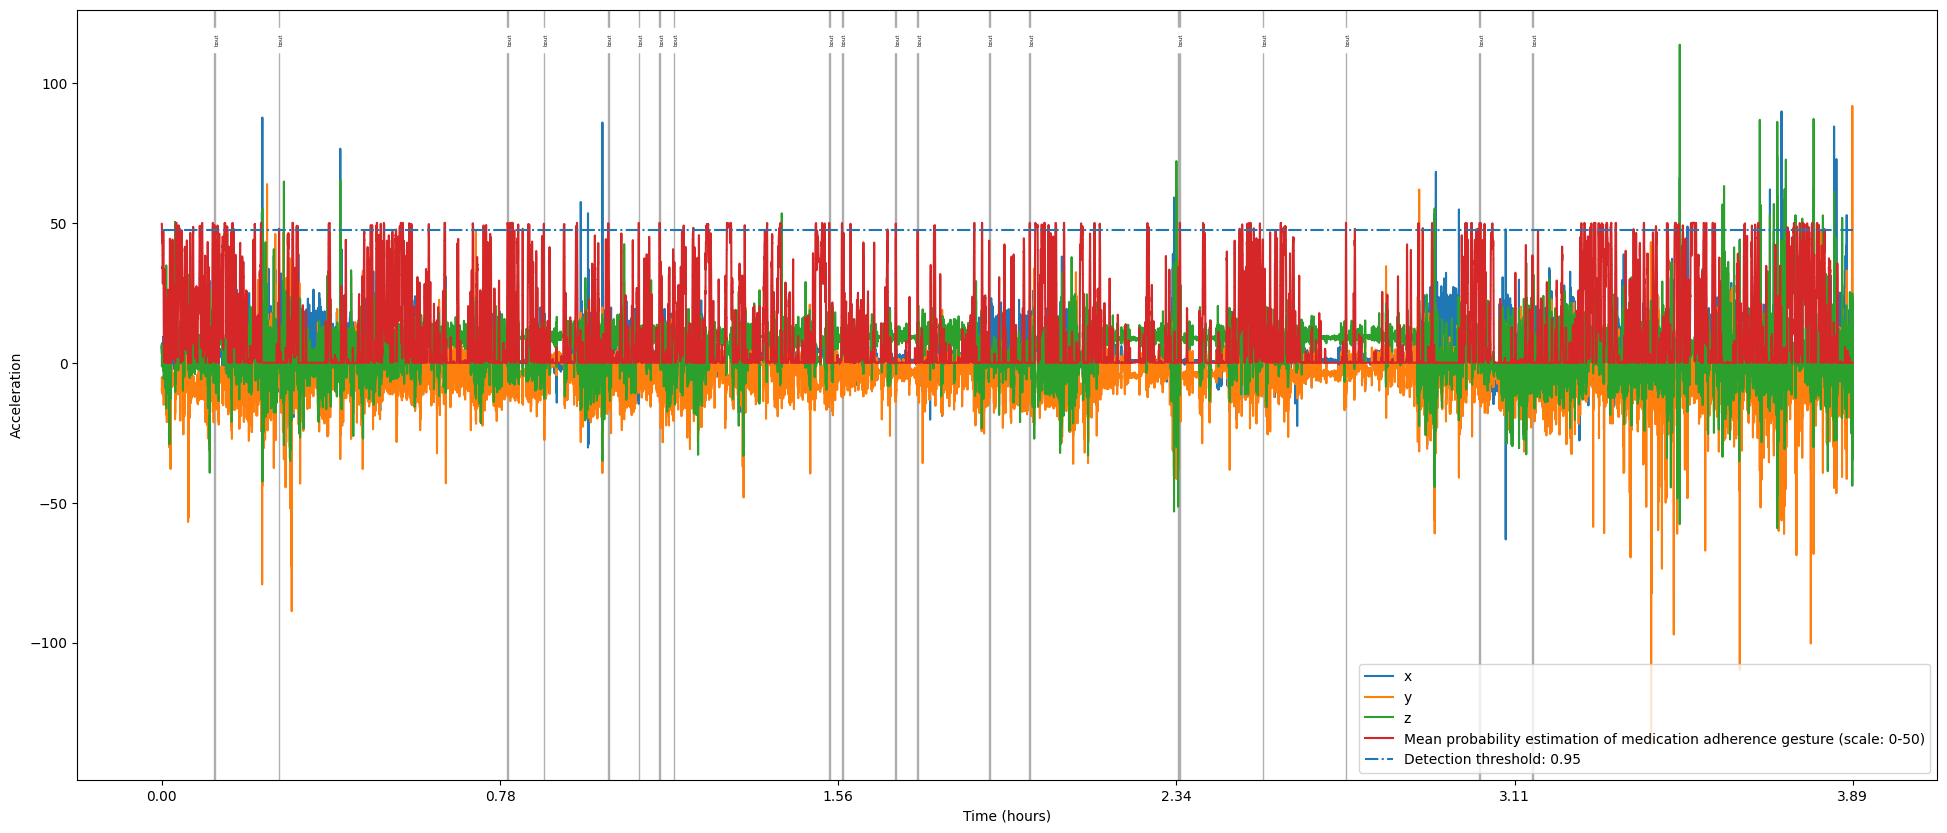

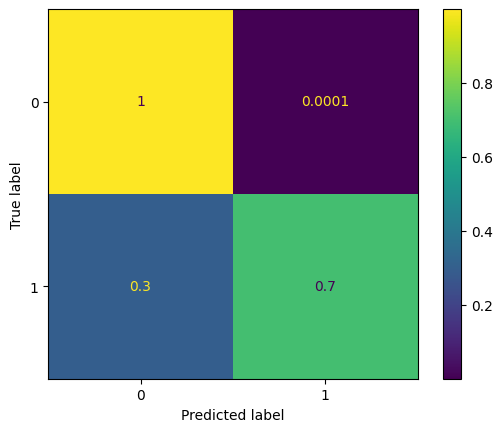

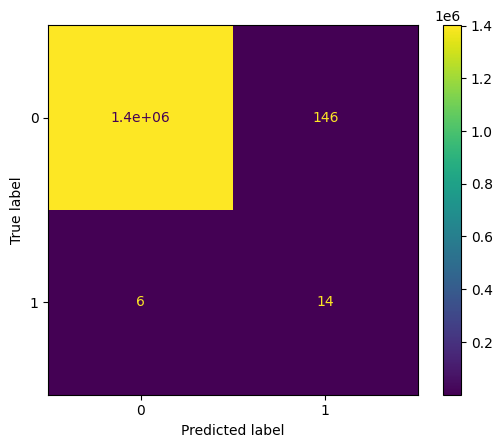

In [5]:
for dir in test_dirs:
    recording_to_test = os.path.join('/home/kuba/Documents/data/raw/kuba_watch_data',dir)
    TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=recording_to_test, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                                confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                                num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)